<a href="https://colab.research.google.com/github/JasmineGhumman/SignLanguageDetection/blob/master/rrupeshhhh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



     |████████████████████████████████| 993kB 4.8MB/s 


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
'''
file_id = '1sNVHpcnPHZiDaSQ6DhhxY1ZbdEByi5gk'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))
'''

fid = drive.ListFile({'q':"title='mydata.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('mydata.zip')

In [0]:
!unzip mydata

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


Found 68250 images belonging to 26 classes.
Found 9775 images belonging to 26 classes.
Epoch 1/12
800/800 [==============================] - 410s 513ms/step - loss: 3.2539 - acc: 0.0460 - val_loss: 3.2427 - val_acc: 0.0399
Epoch 2/12
800/800 [==============================] - 412s 515ms/step - loss: 3.2293 - acc: 0.0672 - val_loss: 3.1831 - val_acc: 0.1074
Epoch 3/12
800/800 [==============================] - 408s 510ms/step - loss: 3.1385 - acc: 0.0910 - val_loss: 2.9830 - val_acc: 0.1546
Epoch 4/12
800/800 [==============================] - 408s 510ms/step - loss: 2.9227 - acc: 0.1402 - val_loss: 2.6175 - val_acc: 0.2296
Epoch 5/12
800/800 [==============================] - 409s 511ms/step - loss: 2.5910 - acc: 0.2212 - val_loss: 2.2139 - val_acc: 0.3273
Epoch 6/12
800/800 [==============================] - 407s 509ms/step - loss: 2.2364 - acc: 0.3038 - val_loss: 1.7754 - val_acc: 0.4728
Epoch 7/12
800/800 [==============================] - 404s 505ms/step - loss: 1.9727 - acc: 0.371

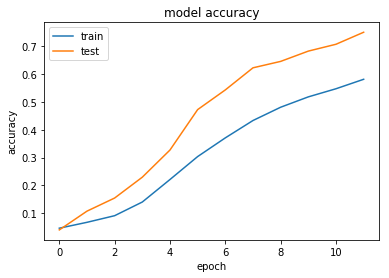

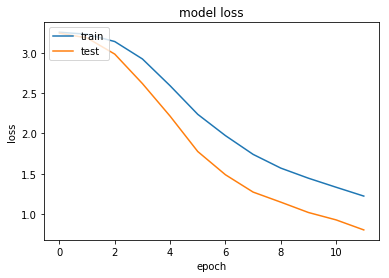

In [6]:
# Part 1 - Building the CNN
#importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers

# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolutio Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (64, 64, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

#Adding 3rd Concolution Layer
classifier.add(Convolution2D(64, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(26, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'mydata/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'mydata/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=800,
        epochs=12,
        validation_data = test_set,
        validation_steps = 6500
      )

#Saving the model
import h5py
classifier.save('Trained_model.h5')

print(model.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()